# Bitcoin Price Prediction - Feature Engineering

This notebook creates technical indicators and features for the Bitcoin price prediction model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from ta import add_all_ta_features
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator

# Add the project root to Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

from config.config import DATA_CONFIG, FEATURE_CONFIG
from utils.data_loader import BitcoinDataLoader
from utils.feature_engineering import FeatureEngineer

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

✅ Configuration loaded - Base directory: C:\bitcoin


## 1. Load Data and Initialize Feature Engineer

In [2]:
# Load data
data_loader = BitcoinDataLoader(DATA_CONFIG)
df = data_loader.load_data()

# Initialize feature engineer
feature_engineer = FeatureEngineer(FEATURE_CONFIG)

print("📊 Original Data Shape:", df.shape)
df.head()

Loading Bitcoin data...
Found existing data file, loading...
❌ Error loading existing data: Missing column provided to 'parse_dates': 'date'
Cleaning up and generating fresh data...
Cleaning up existing data file...
Current file columns: ['index', 'close', 'open', 'high', 'low', 'volume']
Fixing missing 'date' column...
Generating sample Bitcoin data...
✅ Generated sample data with 2144 days (from 2020-01-01 to 2025-11-13)
   Current price: $28,670,613.49
💾 Data saved to C:\bitcoin\data\bitcoin_data.csv
📊 Original Data Shape: (2144, 5)


,close,open,high,low,volume
2020-01-01,30000.000000,29940.000000,30618.225674,29381.774326,2.000000e+10
2020-01-02,29915.023780,30000.000000,30338.617979,29491.429580,2.056651e+10
2020-01-03,30791.540133,29915.023780,31190.601753,29915.023780,2.586004e+10
2020-01-04,32793.042928,30791.540133,33155.678713,30791.540133,3.300034e+10
2020-01-05,32641.936033,32793.042928,32848.033861,32435.838206,2.092158e+10


## 2. Create Technical Indicators

In [3]:
# Add technical indicators
df_features = feature_engineer.add_technical_indicators(df)

print("✅ Features created successfully!")
print("📈 Enhanced Data Shape:", df_features.shape)
print("\nNew feature columns:")
feature_cols = feature_engineer.get_feature_columns(df_features)
print(f"Total features: {len(feature_cols)}")
print("\nFirst 5 features:", feature_cols[:5])
print("\nLast 5 features:", feature_cols[-5:])

Adding technical indicators...
Feature engineering complete. Final shape: (2110, 44)
✅ Features created successfully!
📈 Enhanced Data Shape: (2110, 44)

New feature columns:
Total features: 38

First 5 features: ['sma_5', 'ema_5', 'sma_10', 'ema_10', 'sma_20']

Last 5 features: ['rolling_min_10', 'rolling_max_10', 'rolling_std_20', 'rolling_min_20', 'rolling_max_20']


## 3. Visualize Technical Indicators

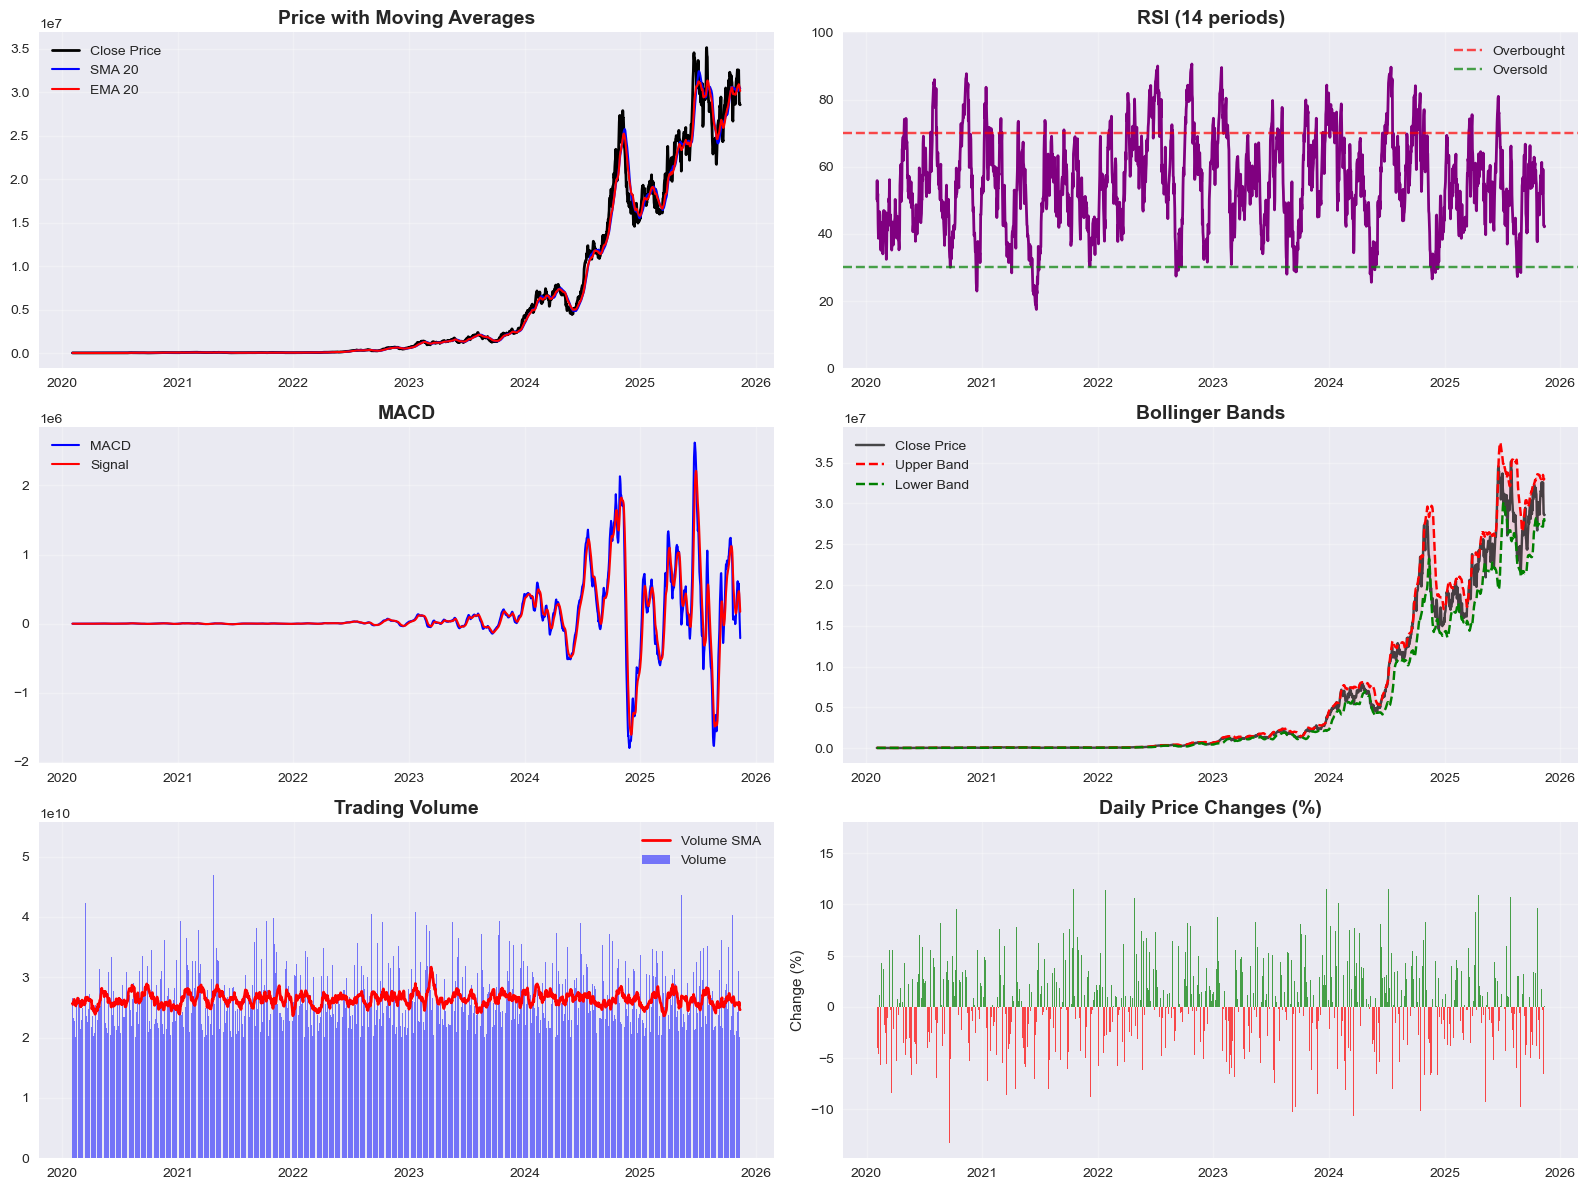

In [4]:
# Plot key technical indicators
plt.figure(figsize=(16, 12))

# Price with Moving Averages
plt.subplot(3, 2, 1)
plt.plot(df_features.index, df_features['close'], label='Close Price', linewidth=2, color='black')
if 'sma_20' in df_features.columns:
    plt.plot(df_features.index, df_features['sma_20'], label='SMA 20', linewidth=1.5, color='blue')
if 'ema_20' in df_features.columns:
    plt.plot(df_features.index, df_features['ema_20'], label='EMA 20', linewidth=1.5, color='red')
plt.title('Price with Moving Averages', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# RSI
plt.subplot(3, 2, 2)
if 'rsi_14' in df_features.columns:
    plt.plot(df_features.index, df_features['rsi_14'], linewidth=2, color='purple')
    plt.axhline(70, linestyle='--', alpha=0.7, color='red', label='Overbought')
    plt.axhline(30, linestyle='--', alpha=0.7, color='green', label='Oversold')
    plt.title('RSI (14 periods)', fontweight='bold', fontsize=14)
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True, alpha=0.3)

# MACD
plt.subplot(3, 2, 3)
if 'macd' in df_features.columns and 'macd_signal' in df_features.columns:
    plt.plot(df_features.index, df_features['macd'], label='MACD', linewidth=1.5, color='blue')
    plt.plot(df_features.index, df_features['macd_signal'], label='Signal', linewidth=1.5, color='red')
    plt.title('MACD', fontweight='bold', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

# Bollinger Bands
plt.subplot(3, 2, 4)
if 'bb_upper' in df_features.columns and 'bb_lower' in df_features.columns:
    plt.plot(df_features.index, df_features['close'], label='Close Price', color='black', alpha=0.7)
    plt.plot(df_features.index, df_features['bb_upper'], label='Upper Band', linestyle='--', color='red')
    plt.plot(df_features.index, df_features['bb_lower'], label='Lower Band', linestyle='--', color='green')
    plt.fill_between(df_features.index, df_features['bb_upper'], df_features['bb_lower'], alpha=0.2)
    plt.title('Bollinger Bands', fontweight='bold', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

# Volume with SMA
plt.subplot(3, 2, 5)
plt.bar(df_features.index, df_features['volume'], alpha=0.5, color='blue', label='Volume')
if 'volume_sma' in df_features.columns:
    plt.plot(df_features.index, df_features['volume_sma'], color='red', linewidth=2, label='Volume SMA')
plt.title('Trading Volume', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Price Change
plt.subplot(3, 2, 6)
if 'price_change' in df_features.columns:
    colors = ['green' if x > 0 else 'red' for x in df_features['price_change']]
    plt.bar(df_features.index, df_features['price_change'] * 100, color=colors, alpha=0.7)
    plt.title('Daily Price Changes (%)', fontweight='bold', fontsize=14)
    plt.ylabel('Change (%)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Feature Statistics and Distribution

📊 Key Feature Statistics:


,rsi_14,macd,bb_width,price_change,volume_ratio
count,2110.000000,2.110000e+03,2110.000000,2110.000000,2110.000000
mean,55.068917,1.004544e+05,0.299243,0.004017,0.999928
std,13.914613,4.592920e+05,0.135561,0.040075,0.180727
min,17.513512,-1.798936e+06,0.095130,-0.132828,0.700764
25%,44.605530,-1.421851e+03,0.191521,-0.022661,0.858849
50%,54.829763,3.593283e+03,0.266471,0.004310,0.962230
75%,64.817156,1.072062e+05,0.378067,0.030151,1.105994
max,90.573871,2.619979e+06,0.796635,0.165195,1.932604


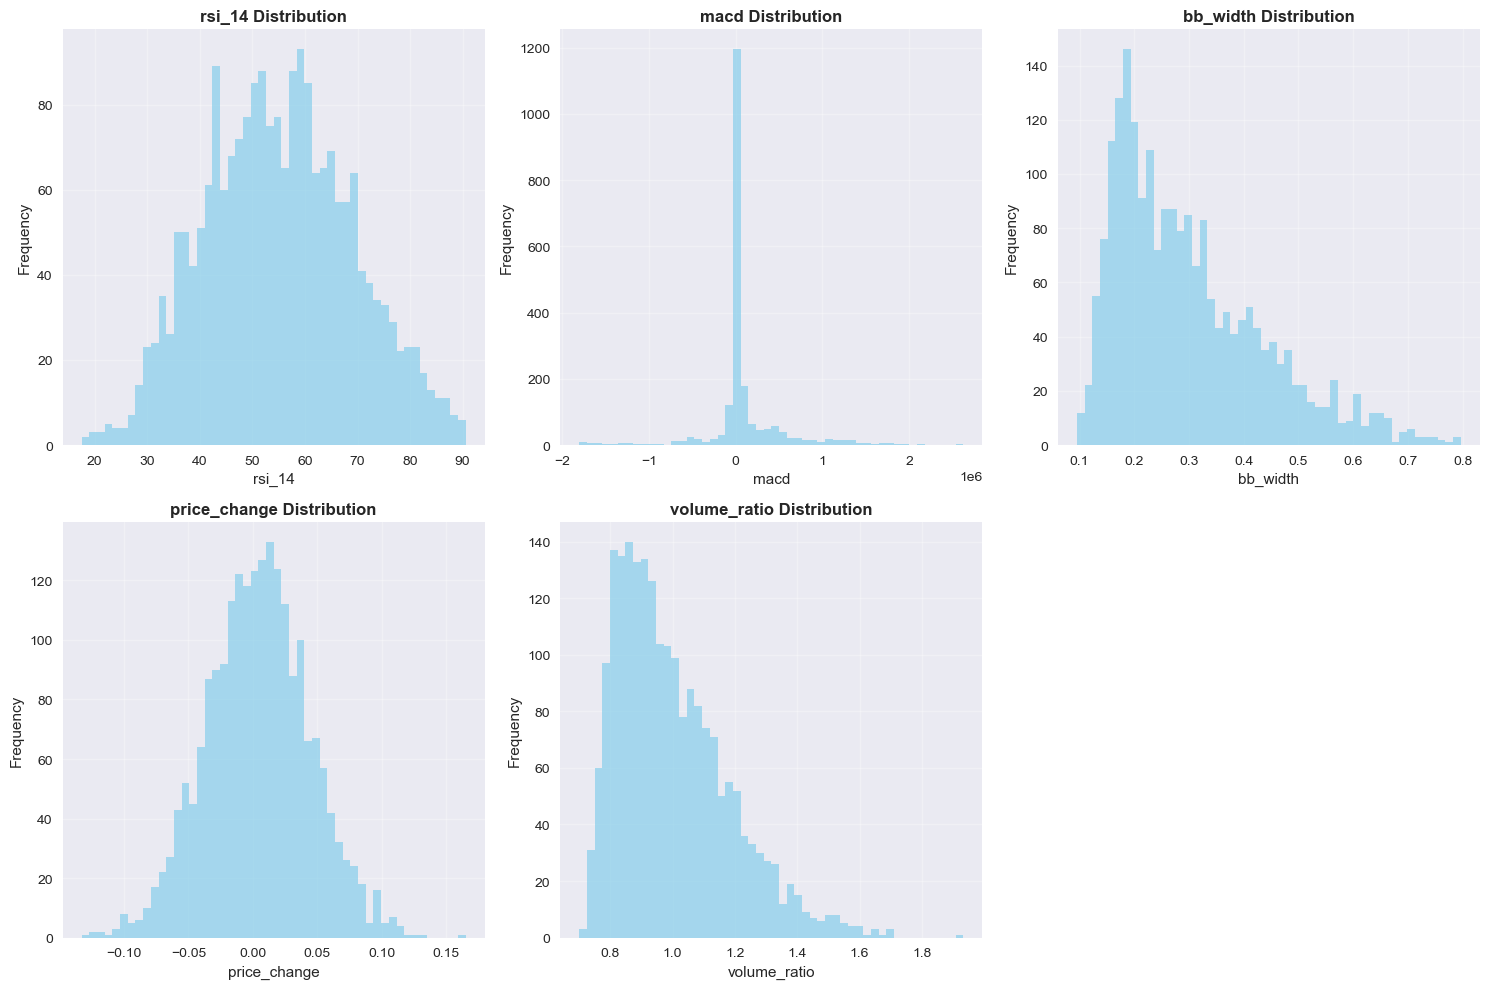

In [5]:
# Select a subset of features for analysis
key_features = ['rsi_14', 'macd', 'bb_width', 'price_change', 'volume_ratio']
available_features = [f for f in key_features if f in df_features.columns]

if available_features:
    print("📊 Key Feature Statistics:")
    display(df_features[available_features].describe())

    # Plot distributions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i, feature in enumerate(available_features[:6]):  # Show first 6 features
        axes[i].hist(df_features[feature].dropna(), bins=50, alpha=0.7, color='skyblue')
        axes[i].set_title(f'{feature} Distribution', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

    # Hide empty subplots
    for i in range(len(available_features), 6):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

## 5. Feature Correlation Analysis

🔗 Top 15 Features Correlated with Target:


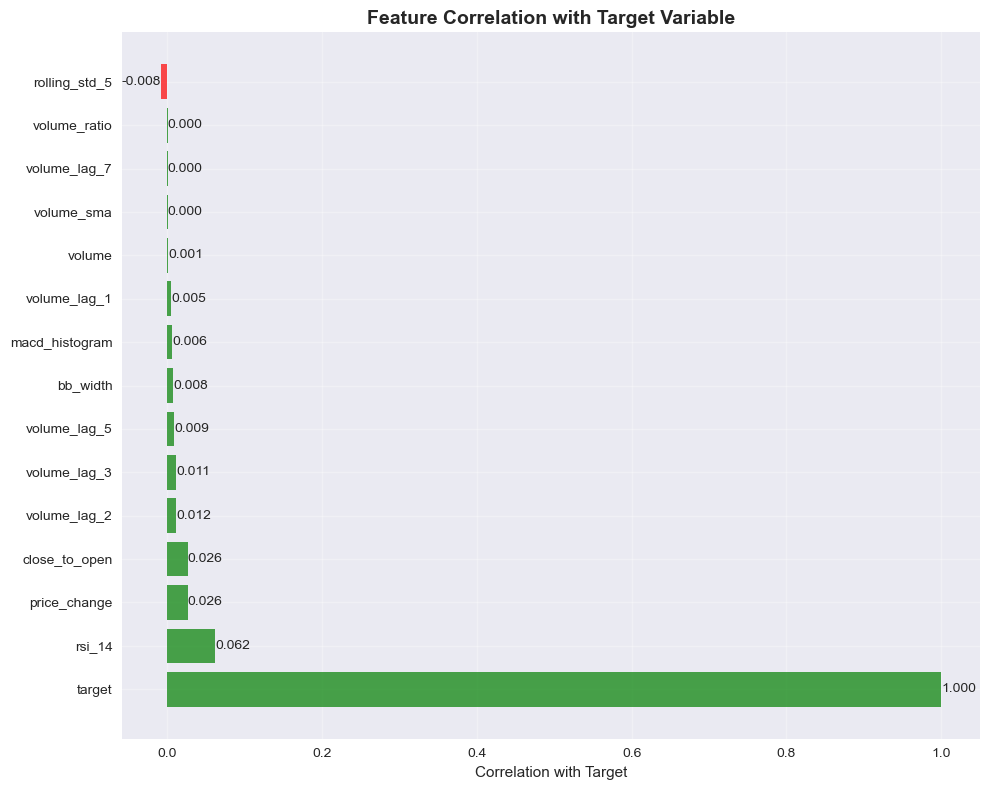

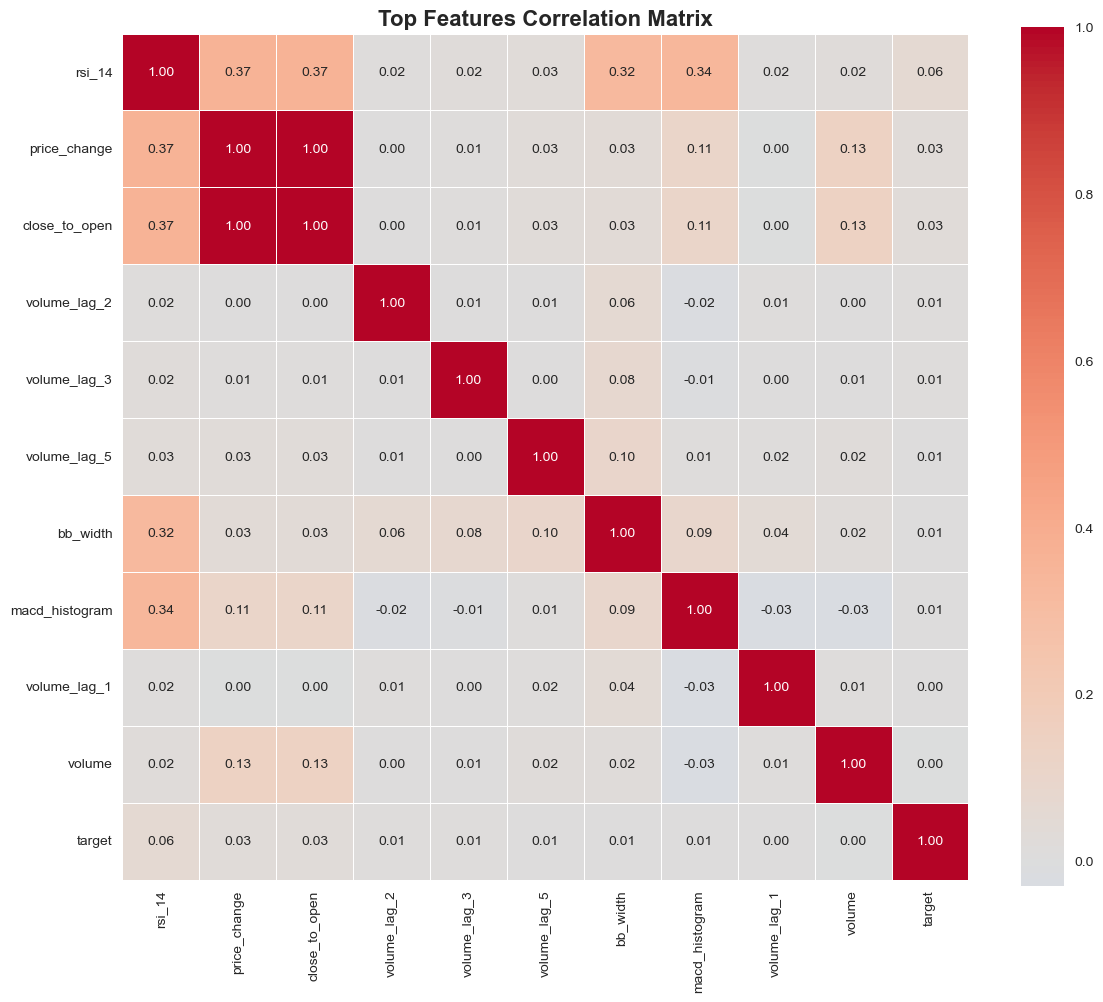

In [6]:
# Calculate correlation with target
if 'target' in df_features.columns:
    # Get numeric columns only
    numeric_cols = df_features.select_dtypes(include=[np.number]).columns
    
    # Calculate correlations with target
    target_correlations = df_features[numeric_cols].corr()['target'].sort_values(ascending=False)
    
    print("🔗 Top 15 Features Correlated with Target:")
    top_features = target_correlations.head(15)
    
    plt.figure(figsize=(10, 8))
    colors = ['red' if x < 0 else 'green' for x in top_features.values]
    bars = plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features.index)
    plt.xlabel('Correlation with Target')
    plt.title('Feature Correlation with Target Variable', fontweight='bold', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center')
    
    plt.tight_layout()
    plt.show()

    # Show correlation matrix for top features
    top_feature_names = top_features.index.tolist()
    if 'target' in top_feature_names:
        top_feature_names.remove('target')
    
    correlation_matrix = df_features[top_feature_names[:10] + ['target']].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', linewidths=0.5)
    plt.title('Top Features Correlation Matrix', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

## 6. Feature Engineering Quality Check

In [7]:
print("🔍 Feature Engineering Quality Report:")
print("=" * 60)

# Check for missing values in features
feature_missing = df_features[feature_cols].isnull().sum()
features_with_missing = feature_missing[feature_missing > 0]

print(f"\nFeatures with missing values: {len(features_with_missing)}")
if len(features_with_missing) > 0:
    for feature, missing_count in features_with_missing.head().items():
        print(f"  {feature}: {missing_count} missing ({missing_count/len(df_features)*100:.2f}%)")

# Check for constant features
constant_features = []
for feature in feature_cols:
    if df_features[feature].nunique() <= 1:
        constant_features.append(feature)

print(f"\nConstant features: {len(constant_features)}")
if constant_features:
    print("  " + ", ".join(constant_features))

# Check for highly correlated features
correlation_matrix = df_features[feature_cols].corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated = [(column, upper_tri[column].idxmax(), upper_tri[column].max()) 
                     for column in upper_tri.columns if upper_tri[column].max() > 0.95]

print(f"\nHighly correlated feature pairs (r > 0.95): {len(highly_correlated)}")
for feat1, feat2, corr in highly_correlated[:5]:  # Show first 5
    print(f"  {feat1} & {feat2}: {corr:.3f}")

# Data types of features
print(f"\nFeature data types:")
print(df_features[feature_cols].dtypes.value_counts())

print("\n✅ Feature engineering complete!")
print(f"📊 Final dataset: {df_features.shape}")
print(f"🎯 Target variable: {'target' in df_features.columns}")

🔍 Feature Engineering Quality Report:

Features with missing values: 0

Constant features: 0

Highly correlated feature pairs (r > 0.95): 20
  ema_5 & sma_5: 1.000
  sma_10 & ema_5: 0.999
  ema_10 & sma_10: 1.000
  sma_20 & ema_10: 0.998
  ema_20 & sma_20: 1.000

Feature data types:
float64    38
Name: count, dtype: int64

✅ Feature engineering complete!
📊 Final dataset: (2110, 44)
🎯 Target variable: True


## 7. Save Processed Data

In [8]:
# Save the feature-engineered data
output_path = '../data/bitcoin_features.csv'
df_features.to_csv(output_path)
print(f"💾 Feature-engineered data saved to: {output_path}")

# Save feature list
feature_info = pd.DataFrame({
    'feature': feature_cols,
    'type': df_features[feature_cols].dtypes.astype(str),
    'missing_values': df_features[feature_cols].isnull().sum(),
    'unique_values': df_features[feature_cols].nunique()
})

feature_info_path = '../data/feature_info.csv'
feature_info.to_csv(feature_info_path, index=False)
print(f"💾 Feature information saved to: {feature_info_path}")

💾 Feature-engineered data saved to: ../data/bitcoin_features.csv
💾 Feature information saved to: ../data/feature_info.csv


## Key Insights from Feature Engineering

1. **Feature Diversity**: Created multiple types of indicators (trend, momentum, volatility)
2. **Technical Patterns**: RSI shows overbought/oversold conditions, MACD captures trend changes
3. **Correlation Analysis**: Some features are highly correlated with the target
4. **Data Quality**: Most features have good coverage with minimal missing values
5. **Feature Relationships**: Identified potential multicollinearity issues

Next: Proceed to model training in the next notebook.